# Problem Definition

Information related to an event can be presented in the form of written news. The news generally contains a topic at the core of what is discussed. And it is important to understand what the news is about. And we have found various news sources everywhere, including Twitter. Twitter has become a common place for people to convey news or information to others, including news related to disasters that have occurred in the surrounding area. For certain parties, it is important to process information on social media and determine the validity or classify the news so that there is no misunderstanding. And often times, prompt and actionable action is required by the relevant authorities to validate the news or information that is still uncertain. Therefore, Natural Language Processing (NLP) and Machine Learning (ML) technology can help us extract information and determine the validity of news or news.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data

In [2]:
df_tweet = pd.read_csv('File CSV/raw_data.csv')
df_tweet.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [3]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [4]:
df_geo = pd.read_csv('File CSV/geodata_clean.csv')
df_geo.head()

,Unnamed: 0,id,lat,lon,city,country
0,0,46,51.50642,-0.12721,London,GBR
1,1,322,51.50642,-0.12721,London,GBR
2,2,344,51.50642,-0.12721,London,GBR
3,3,717,51.50642,-0.12721,London,GBR
4,4,1136,51.50642,-0.12721,London,GBR


In [5]:
df_geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5411 entries, 0 to 5410
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5411 non-null   int64  
 1   id          5411 non-null   int64  
 2   lat         5411 non-null   float64
 3   lon         5411 non-null   float64
 4   city        3727 non-null   object 
 5   country     5408 non-null   object 
dtypes: float64(2), int64(2), object(2)
memory usage: 253.8+ KB


# Data Preprocessing

### 1. Join Dataset and Cleansing

In [6]:
df = df_tweet.merge(df_geo,how='inner',left_on='id',right_on='id')
df.drop(columns=['keyword','location','city'],inplace=True)

In [7]:
df = df.dropna().reset_index(drop=True)
df.to_csv('File CSV/data_clean.csv')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3800 entries, 0 to 3799
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          3800 non-null   int64  
 1   text        3800 non-null   object 
 2   target      3800 non-null   int64  
 3   Unnamed: 0  3800 non-null   int64  
 4   lat         3800 non-null   float64
 5   lon         3800 non-null   float64
 6   country     3800 non-null   object 
dtypes: float64(2), int64(3), object(2)
memory usage: 207.9+ KB


In [9]:
df.head()

,id,text,target,Unnamed: 0,lat,lon,country
0,48,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1,64,52.47891,-1.90592,GBR
1,50,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1,69,7.18810,21.09375,CAF
2,52,Crying out for more! Set me ablaze,0,118,39.95222,-75.16218,USA
3,53,On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0,127,51.50642,-0.12721,GBR
4,54,@PhDSquares #mufc they've built so much hype a...,0,140,-25.74587,28.18763,ZAF


C:\Users\user\miniconda3\envs\defiska\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


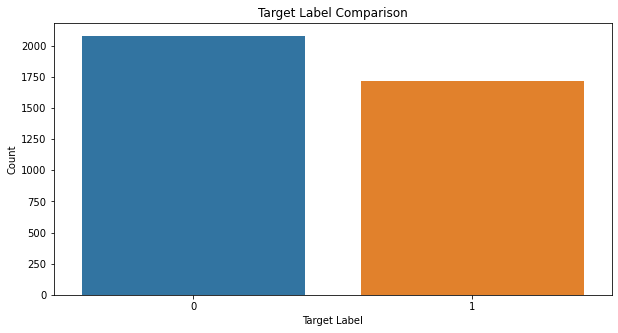

In [10]:
# Target Visualization

plt.subplots(figsize=(10,5))
sns.countplot(df['target'])
plt.xlabel('Target Label')
plt.ylabel('Count')
plt.title('Target Label Comparison')

plt.show()

### 2. Text Preprocessing

In [11]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from string import punctuation
from gensim.models import Word2Vec

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [12]:
# Stopwords Selection

tfidf = TfidfVectorizer(tokenizer=word_tokenize,min_df=4)
tfidf_matrix = tfidf.fit_transform(df['text']) 

In [13]:
df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names())

In [14]:
df_tfidf_top50 = pd.DataFrame(df_tfidf.sum(axis=0).sort_values(ascending=False).head(50))

In [15]:
not_alnum = [x for x in df_tfidf.columns if x.isalnum()==False]

In [16]:
[i for i in df_tfidf_top50.index if i not in stopwords.words("english") + not_alnum]

['http', 'https', 'like', 'new', 'via']

In [17]:
added_sw = ['co','û_','amp',"'d", "'ll", "'re", "'s", "'ve",'``', 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would',
            'like','new','via','got', 'na', 'ta', 'wan', '05', '1', 'calif', 'dr', 'f', 'ft', 'ok', 'p.m', 'r', 'st', 'vs', 'wash', 'z',
           '10', '2', '2-u.s', '3', 'aug', 'corp', 'd.c', 'l.a', 'u.n', 'va', 'u.s']

In [18]:
sw_eng = stopwords.words("english") + list(punctuation) + not_alnum + added_sw

### 3. Dataset Splitting

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X = df.text
y = df.target

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((2660,), (1140,), (2660,), (1140,))

# Model Selection

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold

In [22]:
pipeline = Pipeline([
    ('prep',TfidfVectorizer(tokenizer=word_tokenize,stop_words=sw_eng,min_df=4)),
    ('clf', None)
])

In [23]:
cv = StratifiedKFold(n_splits=3)
search = GridSearchCV(
    pipeline, 
    cv=cv, 
    return_train_score=False, 
    scoring=['accuracy', 'recall', 'f1'],
    refit = 'f1',
    param_grid={
        'clf': [LogisticRegression(),KNeighborsClassifier(),SVC(),RandomForestClassifier()]        
})

In [24]:
search.fit(X_train,y_train)

print('Best model:', search.best_params_)
model_comparison = pd.DataFrame(search.cv_results_)
model_comparison

Best model: {'clf': LogisticRegression()}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,mean_test_accuracy,...,split2_test_recall,mean_test_recall,std_test_recall,rank_test_recall,split0_test_f1,split1_test_f1,split2_test_f1,mean_test_f1,std_test_f1,rank_test_f1
0,0.455936,0.192235,0.148027,0.005185,LogisticRegression(),{'clf': LogisticRegression()},0.753100,0.754228,0.758465,0.755264,...,0.663366,0.661168,0.003712,1,0.710700,0.708556,0.714667,0.711308,0.002531,1
1,0.311906,0.003387,0.204994,0.014198,KNeighborsClassifier(),{'clf': KNeighborsClassifier()},0.613303,0.622322,0.611738,0.615788,...,0.190594,0.200338,0.014114,4,0.309859,0.346979,0.309237,0.322025,0.017647,4
2,0.560941,0.032545,0.248225,0.019970,SVC(),{'clf': SVC()},0.747463,0.764374,0.756208,0.756015,...,0.631188,0.643866,0.015600,2,0.696477,0.720214,0.702479,0.706390,0.010078,2
3,0.795442,0.074915,0.194028,0.019855,RandomForestClassifier(),{'clf': RandomForestClassifier()},0.739572,0.745209,0.755079,0.746620,...,0.601485,0.610879,0.006671,3,0.683128,0.687845,0.691323,0.687432,0.003358,3


C:\Users\user\miniconda3\envs\defiska\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


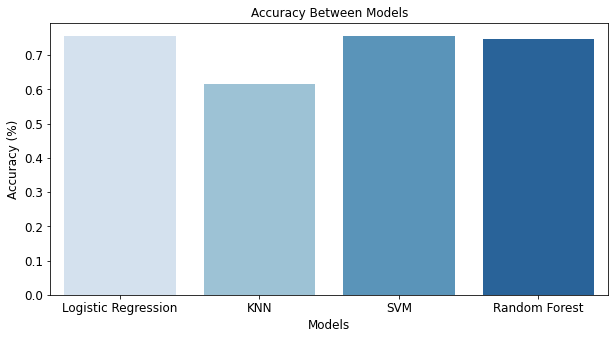

In [25]:
model_comparison['model'] = ['Logistic Regression','KNN','SVM','Random Forest']

fig, ax = plt.subplots(figsize=(10,5))
ax = sns.barplot('model', 'mean_test_accuracy', data=model_comparison, capsize=.05, palette='Blues', ci=None)
ax.set_xlabel("Models",fontsize=12)
ax.set_ylabel("Accuracy (%)",fontsize=12)
ax.tick_params(labelsize=12)
ax.axes.set_title("Accuracy Between Models", fontsize=12)

plt.show()

# Hyperparameter Tuning

In [26]:
pipeline = Pipeline([
    ('prep',TfidfVectorizer(tokenizer=word_tokenize,stop_words=sw_eng,min_df=4)),
    ('algo',LogisticRegression(solver='lbfgs',n_jobs=-1,random_state=42))
])

In [27]:
param_logreg = {
    'algo__fit_intercept':[True],
    'algo__C':np.linspace(0.3,0.5),
}

In [28]:
cv = StratifiedKFold(n_splits=3)
model_logreg = RandomizedSearchCV(pipeline,param_logreg,cv=cv,n_iter=50,n_jobs=-1,verbose=1)
model_logreg.fit(X_train,y_train)

print(model_logreg.best_params_)
print("Train data accuracy score: ", model_logreg.score(X_train,y_train))
print("Test data accuracy score: ", model_logreg.score(X_test,y_test))

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   29.2s finished


{'algo__fit_intercept': True, 'algo__C': 0.4387755102040816}
Train data accuracy score:  0.837218045112782
Test data accuracy score:  0.7956140350877193


The construction of a predictive model with Neural Network is also carried out in the Disaster Tweets with Neural Network.ipynb file and then the best model is selected.

# Evaluation

In [29]:
from sklearn.metrics import plot_confusion_matrix, classification_report, roc_auc_score, roc_curve

Text(0.5, 1.0, 'Confusion Matrix (Normalized)')

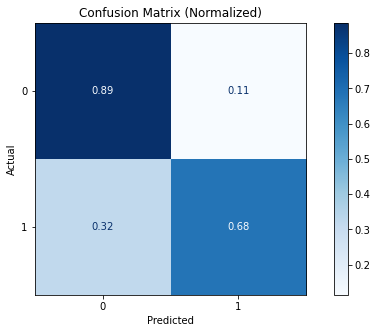

In [30]:
# Confusion Matrix

fig,ax = plt.subplots(figsize=(10,5))
plot_confusion_matrix(model_logreg,X_test,y_test,cmap=plt.cm.Blues,normalize='true',ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix (Normalized)')

In [31]:
# Classification Report

y_pred = model_logreg.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       632
           1       0.83      0.68      0.75       508

    accuracy                           0.80      1140
   macro avg       0.80      0.78      0.79      1140
weighted avg       0.80      0.80      0.79      1140



In [32]:
# ROC-AUC Score

roc_auc = roc_auc_score(y_test, y_pred)
print("ROC-AUC score is",roc_auc)

ROC-AUC score is 0.7845734077544106


In [33]:
y_pred_proba = model_logreg.predict_proba(X_test)
a = [i[1] for i in y_pred_proba]
fpr,tpr,_ = roc_curve(y_test, a)

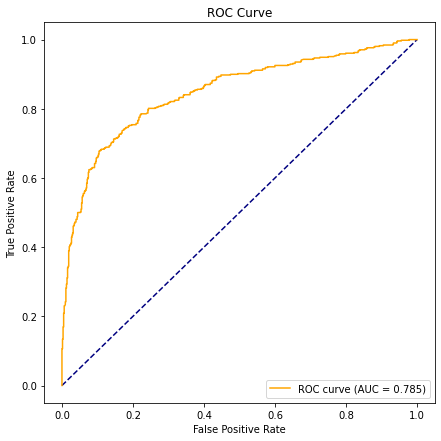

In [34]:
fig = plt.subplots(figsize=(7,7))

plt.plot([0, 1],[0, 1],color='navy',linestyle='--')
plt.plot(fpr,tpr,color='orange',label='ROC curve (AUC = {})'.format(round(roc_auc,3)))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.title('ROC Curve')

plt.show()

In [35]:
# Save Prediction

X_test = pd.DataFrame(X_test)
X_test['target_pred'] = y_pred
X_test.to_csv('File CSV/test_data.csv')